<a href="https://colab.research.google.com/github/zheng-zhu-dopay/MyTest/blob/main/pytorch_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [35]:
California = fetch_california_housing()
df = pd.DataFrame(California.data, columns=California.feature_names).iloc[:,0:6]
df['target'] = California.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [36]:
print(California.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [38]:
X = df.iloc[:,0:6].values
y = df.iloc[:,-1].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().unsqueeze(1) # unsqueeze one add a dimension of size 1 to the tensor that we want to create
y_test = torch.tensor(y_test).float().unsqueeze(1) # unsqueeze one add a dimension of size 1 to the tensor that we want to create

In [60]:
mean = X_train.mean(dim=0)
std = X_train.std(dim=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [61]:
type(X_train)

torch.Tensor

In [66]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, 128, bias=True)
        self.out = nn.Linear(128, output_size, bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
      x = self.fc(x)
      x = self.relu(x)
      x = self.out(x)
      return x


In [67]:
model = LinearRegression(input_size = X_train.shape[1], output_size = 1)

In [68]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [70]:
losses = []
num_epochs = 1000

for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()#otherwise gradient will be accumulated, so have zero_grad() ensure the gradient only from the current pass
    loss.backward()#compute the gradient of loss wrt model parameters
    optimizer.step()#update model paramters based on grad computed on backword using optimziation algorithms.

    if (epoch+1)%100 == 0:
      print(f'Epoch [{epoch+1}/1000, Loss: {loss.item(): .4f}]')

    losses.append(loss.item())

Epoch [100/1000, Loss:  0.5280]
Epoch [200/1000, Loss:  0.5240]
Epoch [300/1000, Loss:  0.5204]
Epoch [400/1000, Loss:  0.5170]
Epoch [500/1000, Loss:  0.5137]
Epoch [600/1000, Loss:  0.5107]
Epoch [700/1000, Loss:  0.5079]
Epoch [800/1000, Loss:  0.5052]
Epoch [900/1000, Loss:  0.5027]
Epoch [1000/1000, Loss:  0.5002]


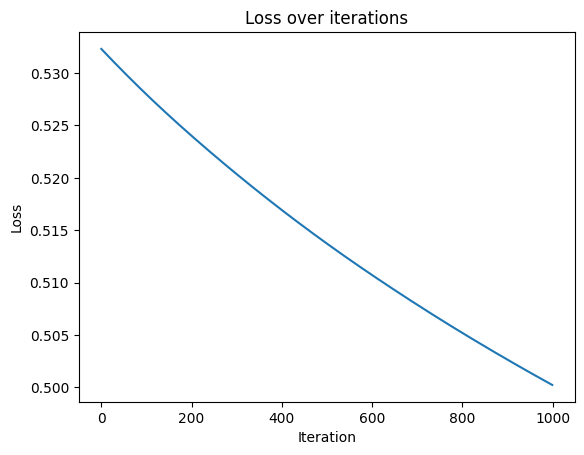

In [71]:
import matplotlib.pyplot as plt
plt.plot(range(1000), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()

In [72]:
with torch.no_grad(): #optimzie memory usage and computation speed
  y_pred = model(X_test)
  test_loss = criterion(y_pred, y_test)
  MAE = nn.L1Loss() # L1Loss is the Mean Absolute Error (MAE)
  mae = MAE(y_pred, y_test)
  print(f'Test Loss: {test_loss.item(): .4f}')
  print(f'Test Loss: {mae.item(): .4f}')

Test Loss:  0.5042
Test Loss:  0.5154


In [73]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100*torch.mean(torch.abs((y_true-y_pred)/y_true))

In [74]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

tensor(31.0294)

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 170M/170M [00:12<00:00, 13.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
train[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [5]:
labels = [item[1] for item in train]
num_classes = len(set(labels))
num_classes

10

In [6]:
image, label = train[20]
print('Shape :', image.shape, '\nlabel :', label)

Shape : torch.Size([3, 32, 32]) 
label : 4


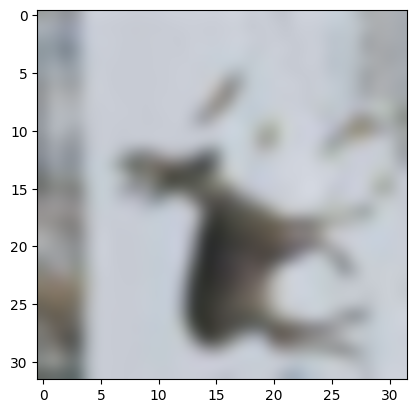

In [8]:
plt.imshow(image.T, interpolation='bicubic') #input of imshow should be (M, N, 3), but we have (3,N, M)

In [9]:
train_loader = torch.utils.data.DataLoader(train, batch_size=50, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=50, shuffle=True)

In [14]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1, bias = True)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2, bias = True)
        self.output = nn.Linear(hidden_size2, num_classes, bias = True)

    def forward(self, x):
        out = x.view(x.size(0), -1) #tensor is 3D tensor, we need to flatten it to 2D tensor, 1st dim is batch size, -1 to flatten the other dimension of x to the 2nd dimension
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.output(out)
        return out

In [13]:
x = torch.randn(2,3,4)
x.view(x.shape[0], -1) #flattening to 2D tensor

tensor([[-0.6776, -0.1772,  0.9863,  0.3104,  0.0296,  0.1089, -1.8672,  0.5764,
          1.5158,  1.5134,  1.9053,  0.7830],
        [ 0.1522,  0.2359, -0.1827,  0.5589,  1.2105,  1.1294, -1.8925,  0.0477,
         -1.2177, -2.5333, -1.2784,  0.2392]])

In [15]:
input_size = 3*32*32
hidden_size1 = 120
hidden_size2 = 100
num_classes = 10
model = ANN(input_size, hidden_size1, hidden_size2, num_classes)
#

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [17]:
loss_list = []
accuracy_list = []

for epoch in range(30):
    epoch_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    loss_list.append(epoch_loss/len(train_loader))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100*correct/total
        accuracy_list.append(accuracy)

    print(f"Epoch [{epoch+1}/30] Training Accuracy: {accuracy:.4f}%")

Epoch [1/30] Training Accuracy: 31.0540%
Epoch [2/30] Training Accuracy: 34.7620%
Epoch [3/30] Training Accuracy: 36.6460%
Epoch [4/30] Training Accuracy: 39.0280%
Epoch [5/30] Training Accuracy: 39.8860%
Epoch [6/30] Training Accuracy: 41.8700%
Epoch [7/30] Training Accuracy: 43.7180%
Epoch [8/30] Training Accuracy: 44.8760%
Epoch [9/30] Training Accuracy: 46.5440%
Epoch [10/30] Training Accuracy: 47.3000%
Epoch [11/30] Training Accuracy: 44.8420%
Epoch [12/30] Training Accuracy: 48.2740%
Epoch [13/30] Training Accuracy: 48.8560%
Epoch [14/30] Training Accuracy: 49.2100%
Epoch [15/30] Training Accuracy: 50.4160%
Epoch [16/30] Training Accuracy: 50.7760%
Epoch [17/30] Training Accuracy: 51.4440%
Epoch [18/30] Training Accuracy: 50.8200%
Epoch [19/30] Training Accuracy: 52.4220%
Epoch [20/30] Training Accuracy: 52.8440%
Epoch [21/30] Training Accuracy: 51.2280%
Epoch [22/30] Training Accuracy: 52.6220%
Epoch [23/30] Training Accuracy: 54.2820%
Epoch [24/30] Training Accuracy: 53.2260%
E

This is a **test**

In [2]:
np1 = np.array([1,2,3,4,5,6])
type(np1)

numpy.ndarray

In [3]:
np2 = np.array([[1,2,3],[4,5,6]])
type(np2)

numpy.ndarray

In [4]:
np2.shape

(2, 3)

In [5]:
np2.size

6

In [7]:
np2.ndim
np1.ndim

1

In [10]:
np1[0]
np1[3:5]

array([4, 5])

In [11]:
np2[0]

array([1, 2, 3])

In [12]:
np3 = np.array([[1,2],[3,4]])
np4 = np.array([[5,6],[7,8]])

In [13]:
np3+np4

array([[ 6,  8],
       [10, 12]])

In [14]:
np3/np4

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

In [15]:
np3*np4

array([[ 5, 12],
       [21, 32]])

In [16]:
np3@np4

array([[19, 22],
       [43, 50]])

In [17]:
import torch

In [22]:
arr1 = np.array([])
arr1.dtype
# ype(arr1)

dtype('float64')

In [21]:
tens1 = torch.tensor([])
type(tens1)
tens1.dtype

torch.float32

In [25]:
arr2 = np.array([1,2,3,4])
arr2
type(arr2)

numpy.ndarray

In [27]:
tens2 = torch.from_numpy(arr2)
tens2

tensor([1, 2, 3, 4])

In [29]:
tens2[1] = 10
tens2

tensor([ 1, 10,  3,  4])

In [30]:
arr2

array([ 1, 10,  3,  4])

In [31]:
arr3 = np.array([10,11,12,13])
tens3 = torch.tensor(arr3)
tens3

tensor([10, 11, 12, 13])

In [32]:
tens3[0] = 200
tens3

tensor([200,  11,  12,  13])

In [33]:
arr3

array([10, 11, 12, 13])